In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
adm_data = pd.read_csv('C:\\Users\\Siddi\\OneDrive\\Documents\\MIMIC Datasets\\mimic-iii-clinical-database-1.4\\ADMISSIONS.csv\\ADMISSIONS.csv')
diag_data = pd.read_csv('C:\\Users\\Siddi\\OneDrive\\Documents\\MIMIC Datasets\\mimic-iii-clinical-database-1.4\\DIAGNOSES_ICD.csv\\DIAGNOSES_ICD.csv')
icu_data=pd.read_csv('C:\\Users\\Siddi\\OneDrive\\Documents\\MIMIC Datasets\\mimic-iii-clinical-database-1.4\\ICUSTAYS.csv\\ICUSTAYS.csv')
pat_data=pd.read_csv('C:\\Users\\Siddi\\OneDrive\\Documents\\MIMIC Datasets\\mimic-iii-clinical-database-1.4\\PATIENTS.csv\\PATIENTS.csv')

In [3]:
diag_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [4]:
adm_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [5]:
pat_data.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [6]:
icu_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [7]:
print(adm_data.info())
print("-------------------------------------------------------------")
print(icu_data.info())
print("-------------------------------------------------------------")
print(pat_data.info())
print("-------------------------------------------------------------")
print(diag_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [8]:
print(adm_data.shape)
print("-------------------------------------------------------------")
print(icu_data.shape)
print("-------------------------------------------------------------")
print(pat_data.shape)
print("-------------------------------------------------------------")
print(diag_data.shape)

(58976, 19)
-------------------------------------------------------------
(61532, 12)
-------------------------------------------------------------
(46520, 8)
-------------------------------------------------------------
(651047, 5)


In [9]:
print(adm_data.describe())
print("-------------------------------------------------------------")
print(icu_data.describe())
print("-------------------------------------------------------------")
print(pat_data.describe())
print("-------------------------------------------------------------")
print(diag_data.describe())

             ROW_ID    SUBJECT_ID        HADM_ID  HOSPITAL_EXPIRE_FLAG  \
count  58976.000000  58976.000000   58976.000000          58976.000000   
mean   29488.500000  33755.583288  149970.809584              0.099261   
std    17025.049075  28092.726225   28883.095213              0.299014   
min        1.000000      2.000000  100001.000000              0.000000   
25%    14744.750000  11993.750000  124952.750000              0.000000   
50%    29488.500000  24133.500000  149989.500000              0.000000   
75%    44232.250000  53851.500000  174966.500000              0.000000   
max    58976.000000  99999.000000  199999.000000              1.000000   

       HAS_CHARTEVENTS_DATA  
count          58976.000000  
mean               0.973006  
std                0.162067  
min                0.000000  
25%                1.000000  
50%                1.000000  
75%                1.000000  
max                1.000000  
-------------------------------------------------------------
 

In [10]:
# EDA and feature engineering in admission csv

In [11]:
adm_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


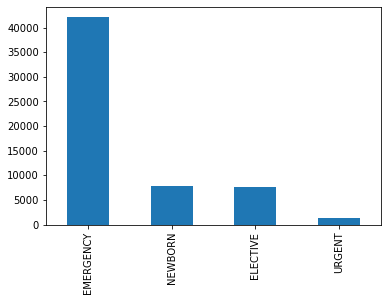

In [12]:
adm_data.ADMISSION_TYPE.value_counts().plot(kind="bar")
plt.show()

In [13]:
# we can see most the admission type is of emergency 

In [14]:
# according to my analysis emergency is equal to urgent 

In [15]:
adm_data.ADMISSION_TYPE=adm_data.ADMISSION_TYPE.apply(lambda x: str(x).replace("URGENT","EMERGENCY"))

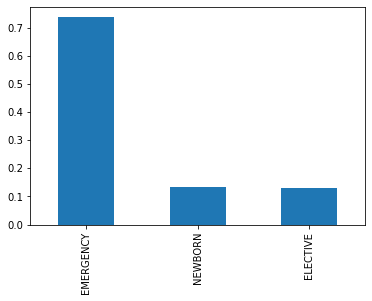

In [16]:
adm_data.ADMISSION_TYPE.value_counts(normalize=True).plot(kind="bar")
plt.show()

In [17]:
adm_data.ADMISSION_LOCATION.value_counts()

EMERGENCY ROOM ADMIT         22754
PHYS REFERRAL/NORMAL DELI    15079
CLINIC REFERRAL/PREMATURE    12032
TRANSFER FROM HOSP/EXTRAM     8456
TRANSFER FROM SKILLED NUR      273
** INFO NOT AVAILABLE **       204
HMO REFERRAL/SICK              102
TRANSFER FROM OTHER HEALT       71
TRSF WITHIN THIS FACILITY        5
Name: ADMISSION_LOCATION, dtype: int64

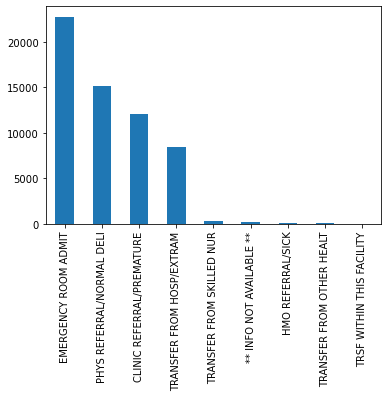

In [18]:
adm_data.ADMISSION_LOCATION.value_counts().plot(kind="bar")
plt.show()

In [19]:
# we will combine all the transfers into one 

In [20]:
z=["TRANSFER FROM HOSP/EXTRAM","TRANSFER FROM SKILLED NUR","TRANSFER FROM OTHER HEALT","TRSF WITHIN THIS FACILITY"]

In [21]:
for i in z:
    adm_data.ADMISSION_LOCATION=adm_data.ADMISSION_LOCATION.apply(lambda x: str(x).replace(i,"transfer from other facilities"))
    

In [22]:
adm_data.ADMISSION_LOCATION.value_counts()

EMERGENCY ROOM ADMIT              22754
PHYS REFERRAL/NORMAL DELI         15079
CLINIC REFERRAL/PREMATURE         12032
transfer from other facilities     8805
** INFO NOT AVAILABLE **            204
HMO REFERRAL/SICK                   102
Name: ADMISSION_LOCATION, dtype: int64

In [23]:
# we can also previous admissions are of refferal, converting them refferal from facilties 

In [24]:
y=["PHYS REFERRAL/NORMAL DELI","CLINIC REFERRAL/PREMATURE","HMO REFERRAL/SICK"]

In [25]:
for i in y:
    adm_data.ADMISSION_LOCATION=adm_data.ADMISSION_LOCATION.apply(lambda x: str(x).replace(i,"refferal from other facilities"))
    

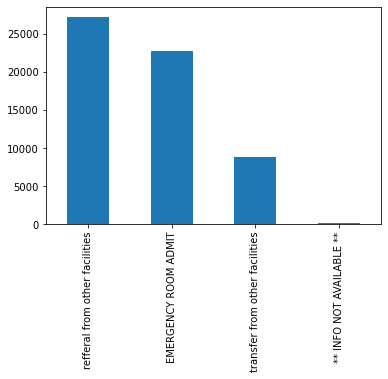

In [26]:
adm_data.ADMISSION_LOCATION.value_counts().plot(kind="bar")
plt.show()

In [27]:
## we can see most of the admission location are emergency room admit 

In [28]:
adm_data.DISCHARGE_LOCATION.value_counts()

HOME                         18962
HOME HEALTH CARE             13963
SNF                           7705
REHAB/DISTINCT PART HOSP      6429
DEAD/EXPIRED                  5854
LONG TERM CARE HOSPITAL       2305
SHORT TERM HOSPITAL           1534
DISC-TRAN CANCER/CHLDRN H      669
DISCH-TRAN TO PSYCH HOSP       446
HOSPICE-HOME                   402
LEFT AGAINST MEDICAL ADVI      365
HOSPICE-MEDICAL FACILITY       153
HOME WITH HOME IV PROVIDR       67
OTHER FACILITY                  63
ICF                             47
DISC-TRAN TO FEDERAL HC         11
SNF-MEDICAID ONLY CERTIF         1
Name: DISCHARGE_LOCATION, dtype: int64

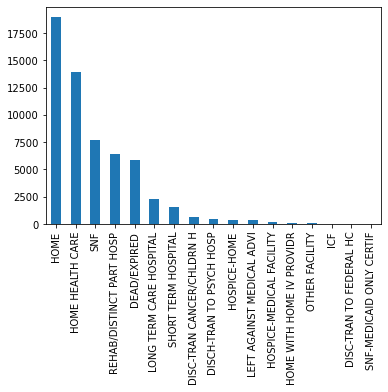

In [29]:
adm_data.DISCHARGE_LOCATION.value_counts().plot(kind="bar")
plt.show()

In [30]:
# HOME WITH HOME IV PROVIDR and HOSPICE home is also a HOME with health care so replacing its value

In [31]:
adm_data.DISCHARGE_LOCATION=adm_data.DISCHARGE_LOCATION.apply(lambda x: str(x).replace("HOME WITH HOME IV PROVIDR","HOME HEALTH CARE"))

In [32]:
adm_data.DISCHARGE_LOCATION=adm_data.DISCHARGE_LOCATION.apply(lambda x: str(x).replace("HOSPICE-HOME","HOME HEALTH CARE"))

In [33]:
# moreover REHAB/DISTINCT PART HOSP,LONG TERM CARE HOSPITAL, SHORT TERM HOSPITAL, DISC-TRAN CANCER/CHLDRN H , 
#DISCH-TRAN TO PSYCH HOSP etc are sent to some other facilities 

In [34]:
a=["SNF","REHAB/DISTINCT PART HOSP","LONG TERM CARE HOSPITAL","SHORT TERM HOSPITAL","DISC-TRAN CANCER/CHLDRN H ","DISCH-TRAN TO PSYCH HOSP","HOSPICE-MEDICAL FACILITY","OTHER FACILITY","ICF","DISC-TRAN TO FEDERAL HC","SNF-MEDICAID ONLY CERTIF","DISC-TRAN CANCER/CHLDRN H"]

In [35]:
for i in a:
    adm_data.DISCHARGE_LOCATION=adm_data.DISCHARGE_LOCATION.apply(lambda x: str(x).replace(i,"sent to other facilities"))
    

In [36]:
adm_data.DISCHARGE_LOCATION.value_counts()

sent to other facilities                         19362
HOME                                             18962
HOME HEALTH CARE                                 14432
DEAD/EXPIRED                                      5854
LEFT AGAINST MEDICAL ADVI                          365
sent to other facilities-MEDICAID ONLY CERTIF        1
Name: DISCHARGE_LOCATION, dtype: int64

In [37]:
adm_data=adm_data[adm_data['DISCHARGE_LOCATION']!="sent to other facilities-MEDICAID ONLY CERTIF"]
 

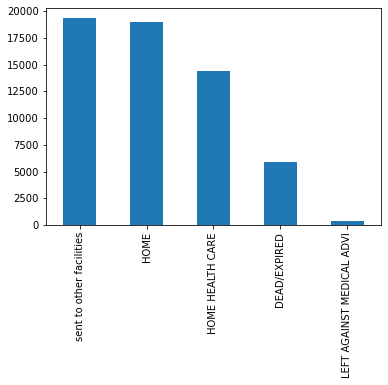

In [38]:
adm_data.DISCHARGE_LOCATION.value_counts().plot(kind="bar")
plt.show()

In [39]:
adm_data.INSURANCE.value_counts()

Medicare      28214
Private       22582
Medicaid       5785
Government     1783
Self Pay        611
Name: INSURANCE, dtype: int64

In [40]:
# medicare and mediaid are services offered by government hence converting them

In [41]:
x=["Medicare","Medicaid"]

In [42]:
for i in x:
    adm_data.INSURANCE=adm_data.INSURANCE.apply(lambda x: str(x).replace(i,"Government"))
    

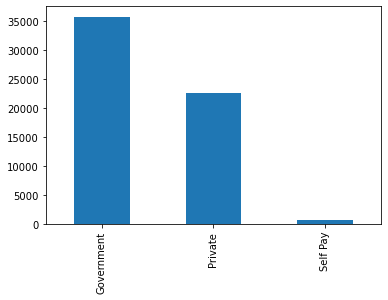

In [43]:
adm_data.INSURANCE.value_counts().plot(kind="bar")
plt.show()

In [44]:
# we wont require language column as it doesnt seems perfect for what we are predicting

In [45]:
adm_data.drop(["LANGUAGE"], axis = 1, inplace=True)

In [46]:
# we wont require religion column as it doesnt seems perfect for what we are predicting

In [47]:
adm_data.drop(["RELIGION"], axis = 1, inplace=True)

In [48]:
adm_data.MARITAL_STATUS.value_counts()

MARRIED              24239
SINGLE               13253
WIDOWED               7211
DIVORCED              3213
SEPARATED              571
UNKNOWN (DEFAULT)      345
LIFE PARTNER            15
Name: MARITAL_STATUS, dtype: int64

In [49]:
# separted is same as divorce and life partner is same as married also converting unknown to np.nan

In [50]:
adm_data.MARITAL_STATUS=adm_data.MARITAL_STATUS.apply(lambda x: str(x).replace("LIFE PARTNER","MARRIED"))
adm_data.MARITAL_STATUS=adm_data.MARITAL_STATUS.apply(lambda x: str(x).replace("SEPARATED","DIVORCED"))

In [51]:
adm_data["MARITAL_STATUS"].replace("UNKNOWN (DEFAULT)", np.nan, inplace=True)
adm_data["MARITAL_STATUS"].replace("nan", np.nan, inplace=True)

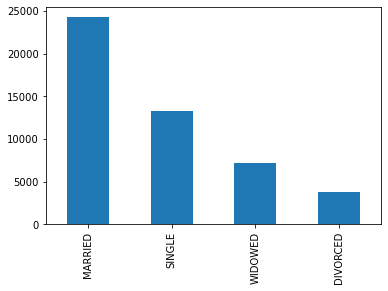

In [52]:
adm_data.MARITAL_STATUS.value_counts().plot(kind="bar")
plt.show()

In [53]:
adm_data.ETHNICITY.value_counts()

WHITE                                                       40995
BLACK/AFRICAN AMERICAN                                       5440
UNKNOWN/NOT SPECIFIED                                        4523
HISPANIC OR LATINO                                           1696
OTHER                                                        1512
ASIAN                                                        1509
UNABLE TO OBTAIN                                              814
PATIENT DECLINED TO ANSWER                                    559
ASIAN - CHINESE                                               277
HISPANIC/LATINO - PUERTO RICAN                                232
BLACK/CAPE VERDEAN                                            200
WHITE - RUSSIAN                                               164
MULTI RACE ETHNICITY                                          130
BLACK/HAITIAN                                                 101
ASIAN - ASIAN INDIAN                                           85
WHITE - OT

In [54]:
v=["ASIAN - CAMBODIAN","ASIAN - OTHER","ASIAN - KOREAN","ASIAN - JAPANESE","ASIAN - THAI","ASIAN - VIETNAMESE","ASIAN - ASIAN INDIAN","ASIAN - CHINESE","ASIAN - FILIPINO"]

In [55]:
for i in v:
    adm_data.ETHNICITY=adm_data.ETHNICITY.apply(lambda x: str(x).replace(i,"ASIAN"))
    

In [56]:
adm_data.ETHNICITY.replace(regex=r'^HISPANIC\D*', value='HISPANIC/LATINO', inplace=True)

In [57]:
adm_data.ETHNICITY.replace(regex=r'^WHITE\D*', value='WHITE', inplace=True)

In [58]:
adm_data.ETHNICITY.replace(regex=r'^BLACK\D*', value='BLACK/AFRICAN AMERICAN', inplace=True)

In [59]:
t=["UNABLE TO OBTAIN", "OTHER", "PATIENT DECLINED TO ANSWER","UNKNOWN/NOT SPECIFIED"]

In [60]:
adm_data['ETHNICITY'].replace(t, value='Unknown/other', inplace=True)

In [61]:
adm_data.ETHNICITY.loc[~adm_data.ETHNICITY.isin(adm_data.ETHNICITY.value_counts().nlargest(5).index.tolist())] = 'Unknown/other'

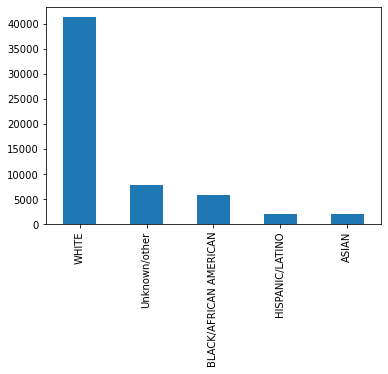

In [62]:
adm_data.ETHNICITY.value_counts().plot(kind="bar")
plt.show()

In [63]:
adm_data.DIAGNOSIS.value_counts()

NEWBORN                                  7823
PNEUMONIA                                1566
SEPSIS                                   1184
CONGESTIVE HEART FAILURE                  928
CORONARY ARTERY DISEASE                   840
                                         ... 
DIAPHRAGM RUPTURE                           1
RIGHT ANTERIOR CEREBRAL ARTERY STROKE       1
HYPOXIA, ACUTE RENAL FAILURE                1
S/P MOTOR VECHICLE ACCIDENT                 1
JOINT EFFUSION                              1
Name: DIAGNOSIS, Length: 15691, dtype: int64

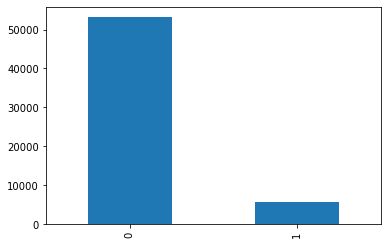

In [64]:
adm_data.HOSPITAL_EXPIRE_FLAG.value_counts().plot(kind="bar")
plt.show()

In [65]:
adm_data['HOSPITAL_EXPIRE_FLAG']=adm_data['HOSPITAL_EXPIRE_FLAG'].astype(object)

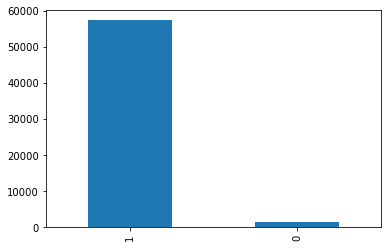

In [66]:
adm_data.HAS_CHARTEVENTS_DATA.value_counts().plot(kind="bar")
plt.show()

In [67]:
adm_data.ADMITTIME = pd.to_datetime(adm_data.ADMITTIME)
adm_data.DISCHTIME = pd.to_datetime(adm_data.DISCHTIME)

In [68]:
adm_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,sent to other facilities,Private,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,refferal from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,transfer from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,transfer from other facilities,HOME,Private,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [69]:
adm_data["LEN_OF_STAY"]= round((adm_data.DISCHTIME-adm_data.ADMITTIME).dt.total_seconds()/86400,3)

In [70]:
adm_data.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'MARITAL_STATUS', 'ETHNICITY',
       'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'HAS_CHARTEVENTS_DATA', 'LEN_OF_STAY'],
      dtype='object')

In [71]:
adm_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,LEN_OF_STAY
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,sent to other facilities,Private,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1,1.144
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,refferal from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,5.497
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,transfer from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1,6.768
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,transfer from other facilities,HOME,Private,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1,2.857
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1,3.534


In [72]:
adm_data.LEN_OF_STAY.describe()

count    58975.000000
mean        10.133933
std         12.456788
min         -0.945000
25%          3.744000
50%          6.467000
75%         11.795000
max        294.660000
Name: LEN_OF_STAY, dtype: float64

In [73]:
# length of stay has negative values. We have to remove them

In [74]:
adm_data=adm_data[adm_data.LEN_OF_STAY>0]

In [75]:
# dropping records in which patients were died because they were never discharged 

In [76]:
adm__data=adm_data[adm_data.HOSPITAL_EXPIRE_FLAG==0]

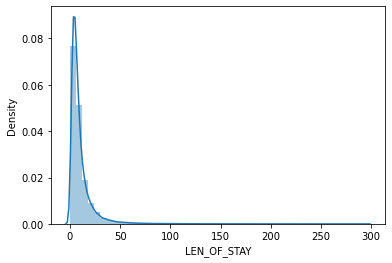

In [77]:
sns.distplot(adm__data.LEN_OF_STAY)
plt.show()

In [78]:
# we can length of stay is right skewed 

In [79]:
# list of columns no longer required 

m=["ROW_ID","DISCHTIME","DEATHTIME","EDREGTIME","EDOUTTIME","HAS_CHARTEVENTS_DATA","HOSPITAL_EXPIRE_FLAG"]

In [80]:
adm__data.drop(m, axis=1, inplace=True)

In [81]:
adm__data.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,LEN_OF_STAY
0,22,165315,2196-04-09 12:26:00,EMERGENCY,EMERGENCY ROOM ADMIT,sent to other facilities,Private,MARRIED,WHITE,BENZODIAZEPINE OVERDOSE,1.144
1,23,152223,2153-09-03 07:15:00,ELECTIVE,refferal from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,5.497
2,23,124321,2157-10-18 19:34:00,EMERGENCY,transfer from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,BRAIN MASS,6.768
3,24,161859,2139-06-06 16:14:00,EMERGENCY,transfer from other facilities,HOME,Private,SINGLE,WHITE,INTERIOR MYOCARDIAL INFARCTION,2.857
4,25,129635,2160-11-02 02:06:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,MARRIED,WHITE,ACUTE CORONARY SYNDROME,3.534


In [82]:
## EDA and feature engineering of patients data

In [83]:
pat_data.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [84]:
# removing all death related columns because we are finding length of stay and these patients were never discharged 
pat_data.drop(["ROW_ID","DOD","DOD_HOSP","DOD_SSN","EXPIRE_FLAG"],axis=1, inplace=True)

In [85]:
pat_data.head()

,SUBJECT_ID,GENDER,DOB
0,249,F,2075-03-13 00:00:00
1,250,F,2164-12-27 00:00:00
2,251,M,2090-03-15 00:00:00
3,252,M,2078-03-06 00:00:00
4,253,F,2089-11-26 00:00:00


In [86]:
pat_data['DOB'] = pd.to_datetime(pat_data['DOB']).dt.date

In [87]:
pat_data.head()

,SUBJECT_ID,GENDER,DOB
0,249,F,2075-03-13
1,250,F,2164-12-27
2,251,M,2090-03-15
3,252,M,2078-03-06
4,253,F,2089-11-26


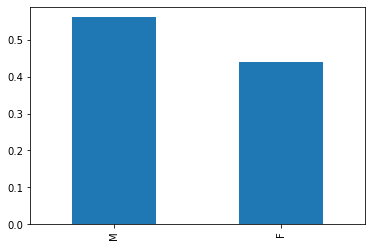

In [88]:
pat_data.GENDER.value_counts(normalize=True).plot(kind="bar")
plt.show()

In [89]:
## EDA and feature engineering diagnoses data

In [90]:
diag_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [91]:
diag_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651047 entries, 0 to 651046
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ROW_ID      651047 non-null  int64  
 1   SUBJECT_ID  651047 non-null  int64  
 2   HADM_ID     651047 non-null  int64  
 3   SEQ_NUM     651000 non-null  float64
 4   ICD9_CODE   651000 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 24.8+ MB


In [92]:
diag_data["codetype"]=diag_data.ICD9_CODE
diag_data["codetype"] = diag_data.ICD9_CODE[~diag_data.ICD9_CODE.str.contains("[a-zA-Z]").fillna(False)]

In [93]:
diag_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,codetype
0,1297,109,172335,1.0,40301,40301
1,1298,109,172335,2.0,486,486
2,1299,109,172335,3.0,58281,58281
3,1300,109,172335,4.0,5855,5855
4,1301,109,172335,5.0,4254,4254


In [94]:
diag_data["codetype"].fillna(value='999', inplace=True)

In [95]:
diag_data['codetype'] = diag_data['codetype'].str.slice(start=0, stop=3, step=1)
diag_data['codetype'] = diag_data['codetype'].astype(int)

In [96]:
code_ranges = [(1, 140), (140, 240), (240, 280), (280, 290), (290, 320), (320, 390),(390, 460), (460, 520), (520, 580), (580, 630), (630, 680), (680, 710),
               (710, 740), (740, 760), (760, 780), (780, 800), (800, 1000), (1000, 2000)]

In [97]:
diag = {0: 'infectious', 1: 'neoplasms', 2: 'endocrine', 3: 'blood',4: 'mental', 5: 'nervous', 6: 'circulatory', 7: 'respiratory',
        8: 'digestive', 9: 'genitourinary', 10: 'pregnancy', 11: 'skin', 12: 'muscular', 13: 'congenital', 14: 'prenatal', 15: 'misc',
             16: 'injury', 17: 'misc'}


In [98]:
for i, j in enumerate(code_ranges):
    diag_data['codetype'] = np.where(diag_data['codetype'].between(j[0],j[1]), 
            i,diag_data['codetype'])

In [99]:
diag_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,codetype
0,1297,109,172335,1.0,40301,6
1,1298,109,172335,2.0,486,7
2,1299,109,172335,3.0,58281,9
3,1300,109,172335,4.0,5855,9
4,1301,109,172335,5.0,4254,6


In [100]:
diag_data['codetype'] = diag_data['codetype'].replace(diag)

In [101]:
diag_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,codetype
0,1297,109,172335,1.0,40301,circulatory
1,1298,109,172335,2.0,486,respiratory
2,1299,109,172335,3.0,58281,genitourinary
3,1300,109,172335,4.0,5855,genitourinary
4,1301,109,172335,5.0,4254,circulatory


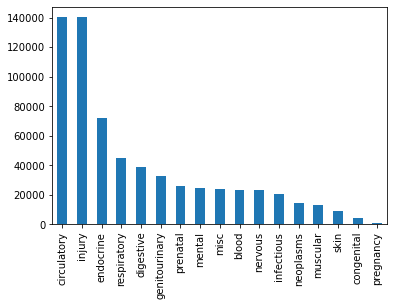

In [102]:
diag_data.codetype.value_counts().plot(kind="bar")
plt.show()

In [103]:
diag = diag_data.groupby('HADM_ID')['codetype'].apply(list).reset_index()
diag.head()

,HADM_ID,codetype
0,100001,"[endocrine, nervous, genitourinary, digestive,..."
1,100003,"[digestive, blood, infectious, digestive, circ..."
2,100006,"[respiratory, respiratory, respiratory, neopla..."
3,100007,"[digestive, digestive, injury, respiratory, ci..."
4,100009,"[circulatory, injury, circulatory, endocrine, ..."


In [104]:
diag_dummy = pd.get_dummies(diag['codetype'].apply(pd.Series).stack()).sum(level=0)
diag_dummy.head()

,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin
0,0,2,0,2,5,2,0,2,0,0,0,0,2,0,0,0,1
1,1,2,0,4,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,2,1,1,0,1,0,0,0,3,0
3,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,7,0,0,3,0,0,7,0,0,0,0,0,0,0,0,0


In [105]:
diag_dummy = diag_dummy.join(diag['HADM_ID'], how="outer")
diag_dummy.head()

,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,HADM_ID
0,0,2,0,2,5,2,0,2,0,0,0,0,2,0,0,0,1,100001
1,1,2,0,4,0,0,1,0,0,1,0,0,0,0,0,0,0,100003
2,0,0,0,0,1,0,0,2,1,1,0,1,0,0,0,3,0,100006
3,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,1,0,100007
4,1,7,0,0,3,0,0,7,0,0,0,0,0,0,0,0,0,100009


In [106]:
diag_dummy.shape

(58976, 18)

In [107]:
model_data = adm__data.merge(diag_dummy, how='inner', on='HADM_ID')

In [108]:
model_data.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,...,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin
0,22,165315,2196-04-09 12:26:00,EMERGENCY,EMERGENCY ROOM ADMIT,sent to other facilities,Private,MARRIED,WHITE,BENZODIAZEPINE OVERDOSE,...,4,1,0,0,0,1,0,0,0,0
1,23,152223,2153-09-03 07:15:00,ELECTIVE,refferal from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,...,1,0,0,0,0,1,0,0,0,0
2,23,124321,2157-10-18 19:34:00,EMERGENCY,transfer from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,BRAIN MASS,...,3,0,0,0,1,1,0,1,0,0
3,24,161859,2139-06-06 16:14:00,EMERGENCY,transfer from other facilities,HOME,Private,SINGLE,WHITE,INTERIOR MYOCARDIAL INFARCTION,...,0,0,0,0,0,0,0,0,0,0
4,25,129635,2160-11-02 02:06:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,MARRIED,WHITE,ACUTE CORONARY SYNDROME,...,0,0,0,0,0,0,0,0,0,0


In [109]:
model_data = model_data.merge(pat_data, how='inner', on='SUBJECT_ID')

In [110]:
model_data.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,...,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,DOB
0,22,165315,2196-04-09 12:26:00,EMERGENCY,EMERGENCY ROOM ADMIT,sent to other facilities,Private,MARRIED,WHITE,BENZODIAZEPINE OVERDOSE,...,0,0,0,1,0,0,0,0,F,2131-05-07
1,23,152223,2153-09-03 07:15:00,ELECTIVE,refferal from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,...,0,0,0,1,0,0,0,0,M,2082-07-17
2,23,124321,2157-10-18 19:34:00,EMERGENCY,transfer from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,BRAIN MASS,...,0,0,1,1,0,1,0,0,M,2082-07-17
3,24,161859,2139-06-06 16:14:00,EMERGENCY,transfer from other facilities,HOME,Private,SINGLE,WHITE,INTERIOR MYOCARDIAL INFARCTION,...,0,0,0,0,0,0,0,0,M,2100-05-31
4,25,129635,2160-11-02 02:06:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,MARRIED,WHITE,ACUTE CORONARY SYNDROME,...,0,0,0,0,0,0,0,0,M,2101-11-21


In [111]:
df_age_min = model_data[['SUBJECT_ID', 'ADMITTIME']].groupby('SUBJECT_ID').min().reset_index()
df_age_min.columns = ['SUBJECT_ID', 'ADMIT_MIN']
df_age_min.head()

,SUBJECT_ID,ADMIT_MIN
0,2,2138-07-17 19:04:00
1,3,2101-10-20 19:08:00
2,4,2191-03-16 00:28:00
3,5,2103-02-02 04:31:00
4,6,2175-05-30 07:15:00


In [112]:
 model_data= model_data.merge(df_age_min, how='outer', on='SUBJECT_ID')

In [113]:
model_data['DOB'] = pd.to_datetime(model_data['DOB']).dt.date

In [114]:
model_data['ADMIT_MIN'] = pd.to_datetime(model_data['ADMIT_MIN']).dt.date

In [115]:
model_data['age'] = model_data.apply(lambda x: (x['ADMIT_MIN'] - x['DOB']).days/365, axis=1)

In [116]:
model_data=model_data[model_data.age<100]

In [117]:
model_data.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,...,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,GENDER,DOB,ADMIT_MIN,age
0,22,165315,2196-04-09 12:26:00,EMERGENCY,EMERGENCY ROOM ADMIT,sent to other facilities,Private,MARRIED,WHITE,BENZODIAZEPINE OVERDOSE,...,0,1,0,0,0,0,F,2131-05-07,2196-04-09,64.969863
1,23,152223,2153-09-03 07:15:00,ELECTIVE,refferal from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,...,0,1,0,0,0,0,M,2082-07-17,2153-09-03,71.178082
2,23,124321,2157-10-18 19:34:00,EMERGENCY,transfer from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,BRAIN MASS,...,1,1,0,1,0,0,M,2082-07-17,2153-09-03,71.178082
3,24,161859,2139-06-06 16:14:00,EMERGENCY,transfer from other facilities,HOME,Private,SINGLE,WHITE,INTERIOR MYOCARDIAL INFARCTION,...,0,0,0,0,0,0,M,2100-05-31,2139-06-06,39.041096
4,25,129635,2160-11-02 02:06:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,MARRIED,WHITE,ACUTE CORONARY SYNDROME,...,0,0,0,0,0,0,M,2101-11-21,2160-11-02,58.989041


In [118]:
icu_data.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [119]:
icu_data['FIRST_CAREUNIT'].replace({'CCU': 'ICU', 'CSRU': 'ICU', 'MICU': 'ICU',
                                  'SICU': 'ICU', 'TSICU': 'ICU'}, inplace=True)

In [120]:
icu_data['ICU_flag'] = icu_data['FIRST_CAREUNIT']
icu = icu_data.groupby('HADM_ID')['ICU_flag'].apply(list).reset_index()
icu.head()

,HADM_ID,ICU_flag
0,100001,[ICU]
1,100003,[ICU]
2,100006,[ICU]
3,100007,[ICU]
4,100009,[ICU]


In [121]:
icu_dummy = pd.get_dummies(icu['ICU_flag'].apply(pd.Series).stack()).sum(level=0)
icu_dummy[icu_dummy >= 1] = 1
icu_dummy = icu_dummy.join(icu['HADM_ID'], how="outer")
icu_dummy.head()

,ICU,NICU,HADM_ID
0,1,0,100001
1,1,0,100003
2,1,0,100006
3,1,0,100007
4,1,0,100009


In [122]:
model_data =model_data.merge(icu_dummy, how='outer', on='HADM_ID')

In [123]:
model_data.ICU.fillna(value=0, inplace=True)
model_data.NICU.fillna(value=0, inplace=True)

In [124]:
model_data.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,...,pregnancy,prenatal,respiratory,skin,GENDER,DOB,ADMIT_MIN,age,ICU,NICU
0,22.0,165315,2196-04-09 12:26:00,EMERGENCY,EMERGENCY ROOM ADMIT,sent to other facilities,Private,MARRIED,WHITE,BENZODIAZEPINE OVERDOSE,...,0.0,0.0,0.0,0.0,F,2131-05-07,2196-04-09,64.969863,1.0,0.0
1,23.0,152223,2153-09-03 07:15:00,ELECTIVE,refferal from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,...,0.0,0.0,0.0,0.0,M,2082-07-17,2153-09-03,71.178082,1.0,0.0
2,23.0,124321,2157-10-18 19:34:00,EMERGENCY,transfer from other facilities,HOME HEALTH CARE,Government,MARRIED,WHITE,BRAIN MASS,...,0.0,1.0,0.0,0.0,M,2082-07-17,2153-09-03,71.178082,1.0,0.0
3,24.0,161859,2139-06-06 16:14:00,EMERGENCY,transfer from other facilities,HOME,Private,SINGLE,WHITE,INTERIOR MYOCARDIAL INFARCTION,...,0.0,0.0,0.0,0.0,M,2100-05-31,2139-06-06,39.041096,1.0,0.0
4,25.0,129635,2160-11-02 02:06:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,MARRIED,WHITE,ACUTE CORONARY SYNDROME,...,0.0,0.0,0.0,0.0,M,2101-11-21,2160-11-02,58.989041,1.0,0.0


In [125]:
model_data.ICU=model_data.ICU.astype("object")

In [126]:
model_data.NICU=model_data.NICU.astype("object")

In [127]:
drop=["SUBJECT_ID","HADM_ID","ADMITTIME","DOB","ADMIT_MIN"]

In [128]:
model_data.drop(drop,axis=1,inplace=True)

In [129]:
model_data.drop("DIAGNOSIS",axis=1, inplace=True)

In [130]:
model_data.drop("DISCHARGE_LOCATION",axis=1, inplace=True)

In [131]:
model_data=pd.get_dummies(model_data, columns=['ADMISSION_TYPE','INSURANCE','ETHNICITY', 'ADMISSION_LOCATION', 'MARITAL_STATUS',"GENDER"])

In [132]:
model_data.isnull().sum()

LEN_OF_STAY                                          7858
blood                                                7858
circulatory                                          7858
congenital                                           7858
digestive                                            7858
endocrine                                            7858
genitourinary                                        7858
infectious                                           7858
injury                                               7858
mental                                               7858
misc                                                 7858
muscular                                             7858
neoplasms                                            7858
nervous                                              7858
pregnancy                                            7858
prenatal                                             7858
respiratory                                          7858
skin          

In [133]:
model_data=model_data.dropna()

In [134]:
model_data.head()

,LEN_OF_STAY,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_refferal from other facilities,ADMISSION_LOCATION_transfer from other facilities,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED,GENDER_F,GENDER_M
0,1.144,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,0,1,0,0,0,1,0,0,1,0
1,5.497,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,1
2,6.768,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,...,0,0,0,1,0,1,0,0,0,1
3,2.857,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,1
4,3.534,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1


In [135]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51036 entries, 0 to 51035
Data columns (total 42 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   LEN_OF_STAY                                        51036 non-null  float64
 1   blood                                              51036 non-null  float64
 2   circulatory                                        51036 non-null  float64
 3   congenital                                         51036 non-null  float64
 4   digestive                                          51036 non-null  float64
 5   endocrine                                          51036 non-null  float64
 6   genitourinary                                      51036 non-null  float64
 7   infectious                                         51036 non-null  float64
 8   injury                                             51036 non-null  float64
 9   mental

In [136]:
model_data

,LEN_OF_STAY,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_refferal from other facilities,ADMISSION_LOCATION_transfer from other facilities,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED,GENDER_F,GENDER_M
0,1.144,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,0,1,0,0,0,1,0,0,1,0
1,5.497,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,1
2,6.768,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,...,0,0,0,1,0,1,0,0,0,1
3,2.857,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,1
4,3.534,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51031,10.794,0.0,4.0,0.0,2.0,0.0,0.0,1.0,2.0,0.0,...,0,0,1,0,0,0,0,1,1,0
51032,10.573,1.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0,1,0,0,0,1,0,0,0,1
51033,4.146,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0,0,1,0,0,1,0,0,0,1
51034,2.742,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,0.0,...,0,0,1,0,0,0,1,0,1,0


In [137]:
from sklearn.model_selection import train_test_split

In [138]:
from sklearn.tree import DecisionTreeRegressor

In [139]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

In [140]:
np.random.seed(0)
df_train, df_test = train_test_split(model_data, train_size=0.8,test_size=0.2, random_state=100,shuffle=True)

In [141]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [142]:
df_train['LEN_OF_STAY'] = scaler.fit_transform(df_train[['LEN_OF_STAY']])
df_test['LEN_OF_STAY'] = scaler.transform(df_test[['LEN_OF_STAY']])

In [143]:
y_train = df_train.pop("LEN_OF_STAY")
X_train = df_train

y_test = df_test.pop("LEN_OF_STAY")
X_test = df_test

In [144]:
X_test.shape, X_train.shape

((10208, 41), (40828, 41))

In [145]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

In [146]:
y_train_pred = dt.predict(X_train)

In [147]:
from sklearn.metrics import r2_score

In [148]:
r2_score(y_train, y_train_pred)

0.31064417653789667

In [149]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_train_pred)

0.0012233773256710109

In [150]:
y_test_pred = dt.predict(X_test)

In [151]:
r2_score(y_test, y_test_pred)

0.3601967080069599

In [152]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

0.0011801236024813495

In [153]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 8, 'min_samples_split': 40}
0.001185003465366101


In [154]:
new_model = DecisionTreeRegressor(max_depth=8,
                                  min_samples_split=40)

new_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=40)

In [155]:
y_train_pred = new_model.predict(X_train)

In [156]:
r2_score(y_train, y_train_pred)

0.408334998845035

In [157]:
mean_squared_error(y_train, y_train_pred)

0.0010500086053830057

In [158]:
y_test_pred = new_model.predict(X_test)

In [159]:
r2_score(y_test, y_test_pred)

0.39821902012769683

In [160]:
mean_squared_error(y_test, y_test_pred)

0.0011099910656280029

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [162]:
#grid_search.fit(X_train, y_train)
#grid_search.best_params_

In [163]:
rf = RandomForestRegressor(bootstrap= True,max_depth=100,max_features= 3,
                           min_samples_leaf= 3,min_samples_split= 10,n_estimators= 300)

In [164]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=300)

In [165]:
y_train_pred = rf.predict(X_train)

In [166]:
r2_score(y_train, y_train_pred)

0.4991058021742466

In [167]:
mean_squared_error(y_train, y_train_pred)

0.0008889206173709558

In [168]:
y_test_pred = rf.predict(X_test)

In [169]:
r2_score(y_test, y_test_pred)

0.4070452076206904

In [170]:
mean_squared_error(y_test, y_test_pred)

0.0010937110740887898

In [171]:
model_data.head()

,LEN_OF_STAY,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_refferal from other facilities,ADMISSION_LOCATION_transfer from other facilities,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED,GENDER_F,GENDER_M
0,1.144,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,0,1,0,0,0,1,0,0,1,0
1,5.497,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,1
2,6.768,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,...,0,0,0,1,0,1,0,0,0,1
3,2.857,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,1
4,3.534,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1


In [172]:
# lets make this an classification problem now 
# if len of stay is less than equal to 10 than its label is 0
# if len of stay is more than 10 than its label is 1

In [173]:
class_data=model_data.copy()

In [174]:
class_data.head()

,LEN_OF_STAY,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,...,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_refferal from other facilities,ADMISSION_LOCATION_transfer from other facilities,MARITAL_STATUS_DIVORCED,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED,GENDER_F,GENDER_M
0,1.144,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,...,0,1,0,0,0,1,0,0,1,0
1,5.497,0.0,4.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,1,0,0,1,0,0,0,1
2,6.768,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,...,0,0,0,1,0,1,0,0,0,1
3,2.857,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,0,0,1
4,3.534,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,1,0,0,0,1


In [175]:
class_data["class_los_label"]= class_data["LEN_OF_STAY"].apply(lambda x: str(0) if x<=10 else str(1))

In [176]:
class_data.drop("LEN_OF_STAY", axis=1, inplace=True)

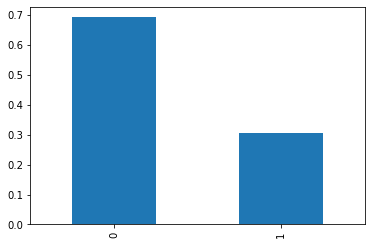

In [177]:
class_data.class_los_label.value_counts(normalize=True).plot(kind="bar")
plt.show()

In [178]:
# we can see data data is imbalanced 

In [179]:
X=class_data.drop(["class_los_label"],axis=1)

In [180]:
y=class_data["class_los_label"]

In [181]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=100, shuffle=True)

In [182]:
y_train.value_counts(normalize=True)

0    0.693372
1    0.306628
Name: class_los_label, dtype: float64

In [183]:
y_test.value_counts(normalize=True)

0    0.689753
1    0.310247
Name: class_los_label, dtype: float64

In [184]:
# handling imbalnce problem 

# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=27)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

56618

In [185]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [186]:
dtree = DecisionTreeClassifier()
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(dtree,n_features_to_select=20)

# Fit the rfe model with train set
rfe = rfe.fit(X_resampled_smt, y_resampled_smt)

In [187]:
# RFE selected columns
rfe_cols = X_resampled_smt.columns[rfe.support_]
print(rfe_cols)

Index(['blood', 'circulatory', 'digestive', 'endocrine', 'genitourinary',
       'infectious', 'injury', 'mental', 'misc', 'muscular', 'neoplasms',
       'nervous', 'prenatal', 'respiratory', 'skin', 'age', 'ETHNICITY_WHITE',
       'ADMISSION_LOCATION_refferal from other facilities',
       'MARITAL_STATUS_MARRIED', 'GENDER_F'],
      dtype='object')


In [188]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_resampled_smt[rfe_cols],y_resampled_smt)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [189]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.155799,0.012851,0.036331,0.006940,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.225724,0.047187,0.052582,0.011328,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,0.165192,0.038695,0.036868,0.015044,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,0.134946,0.007306,0.031133,0.002559,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,0.176671,0.004769,0.028143,0.002075,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,0.180691,0.008601,0.028935,0.001756,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
6,0.179846,0.007269,0.029462,0.001604,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
7,0.217734,0.022300,0.036068,0.003339,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8


In [190]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [191]:
dt= DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)

dt.fit(X_resampled_smt[rfe_cols], y_resampled_smt)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)

In [192]:
# Predictions on the train set
y_train_pred = dt.predict(X_resampled_smt[rfe_cols])

In [193]:
# Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion = metrics.confusion_matrix(y_resampled_smt, y_train_pred)
print(confusion)

[[21855  6454]
 [ 8015 20294]]


In [194]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [195]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_resampled_smt, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.744445229432336
Sensitivity:- 0.7168744922109577
Specificity:- 0.7720159666537144


In [196]:
# Prediction on the test set
y_test_pred = dt.predict(X_test[rfe_cols])

In [197]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5460 1581]
 [1268 1899]]


In [198]:
P = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [211]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

#F1 Score
from sklearn.metrics import f1_score
print("F1_Score",f1_score(y_test, y_test_pred, pos_label="0"))


Accuracy:- 0.7209051724137931
Sensitivity:- 0.9411928392542436
Specificity:- 0.7754580315296122
F1_Score 0.7930859176410777


In [204]:
y_test.astype("str")

37611    0
41184    0
45658    0
4908     0
2995     0
        ..
3010     0
34295    0
22681    0
25308    1
9478     0
Name: class_los_label, Length: 10208, dtype: object

In [212]:
## Logistic regression

In [213]:
##### Importing stats model
import statsmodels.api as sm

In [214]:
X_resampled_smt.ICU=X_resampled_smt.ICU.astype("int")

In [215]:
X_resampled_smt.NICU=X_resampled_smt.NICU.astype("int")

In [216]:
X_resampled_smt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56618 entries, 0 to 56617
Data columns (total 41 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   blood                                              56618 non-null  float64
 1   circulatory                                        56618 non-null  float64
 2   congenital                                         56618 non-null  float64
 3   digestive                                          56618 non-null  float64
 4   endocrine                                          56618 non-null  float64
 5   genitourinary                                      56618 non-null  float64
 6   infectious                                         56618 non-null  float64
 7   injury                                             56618 non-null  float64
 8   mental                                             56618 non-null  float64
 9   misc  

In [217]:
y_resampled_smt=y_resampled_smt.astype("int")

In [218]:
lreg=sm.GLM(y_resampled_smt,(sm.add_constant(X_resampled_smt)),family=sm.families.Binomial())

In [219]:
# Fit the model
lreg=lreg.fit().summary()

In [220]:
lreg

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        class_los_label   No. Observations:                56618
Model:                            GLM   Df Residuals:                    56576
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23895.
Date:                Sat, 10 Dec 2022   Deviance:                       47791.
Time:                        21:25:07   Pearson chi2:                 4.52e+04
No. Iterations:                    29   Pseudo R-squ. (CS):             0.4185
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                               144.6232   7.86e+04      0.002      0.999   -1.54e+05    1.54e+05
blood                                                 0.0625      0.019      3.301      0.001       0.025       0.100
circulatory                                           0.1111      0.006     17.518      0.000       0.099       0.123
congenital                                            0.2610      0.037      7.109      0.000       0.189       0.333
digestive                                             0.2263      0.011     21.044      0.000       0.205       0.247
endocrine                                            -0.0576      0.010     -5.724      0.000      -0.077      -0.038
genitourinary                                         0.1523      0.015     10.112      0.000       0.123       0.182
infectious                                            0.4369      0.019     22.689      0.000       0.399       0.475
injury                                                0.1034      0.005     19.644      0.000       0.093       0.114
mental                                               -0.2171      0.015    -14.264      0.000      -0.247      -0.187
misc                                                  0.1215      0.017      7.150      0.000       0.088       0.155
muscular                                             -0.0282      0.021     -1.338      0.181      -0.070       0.013
neoplasms                                             0.1527      0.017      8.873      0.000       0.119       0.186
nervous                                               0.0741      0.016      4.682      0.000       0.043       0.105
pregnancy                                             0.1828      0.041      4.435      0.000       0.102       0.264
prenatal                                              0.8152      0.016     51.497      0.000       0.784       0.846
respiratory                                           0.4826      0.011     41.977      0.000       0.460       0.505
skin                                                  0.2582      0.024     10.913      0.000       0.212       0.305
age                                                  -0.0005      0.001     -0.456      0.648      -0.002       0.001
ICU                                                   0.0316      0.084      0.376      0.707      -0.133       0.196
NICU                                                 -1.2008      0.183     -6.548      0.000      -1.560      -0.841
ADMISSION_TYPE_ELECTIVE                             -28.8533   4.86e+04     -0.001      1.000   -9.53e+04    9.53e+04
ADMISSION_TYPE_EMERGENCY                            -29.0852   4.86e+04     -0.001      1.000   -9.53e+04    9.53e+04
ADMISSION_TYPE_

In [221]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

In [222]:
# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_resampled_smt, y_resampled_smt)

In [223]:
rfe_cols = X_resampled_smt.columns[rfe.support_]
print(rfe_cols)

Index(['INSURANCE_Government', 'INSURANCE_Private', 'INSURANCE_Self Pay',
       'ETHNICITY_ASIAN', 'ETHNICITY_BLACK/AFRICAN AMERICAN',
       'ETHNICITY_HISPANIC/LATINO', 'ETHNICITY_Unknown/other',
       'ETHNICITY_WHITE', 'ADMISSION_LOCATION_** INFO NOT AVAILABLE **',
       'ADMISSION_LOCATION_EMERGENCY ROOM ADMIT',
       'ADMISSION_LOCATION_refferal from other facilities',
       'ADMISSION_LOCATION_transfer from other facilities',
       'MARITAL_STATUS_SINGLE', 'GENDER_F', 'GENDER_M'],
      dtype='object')


In [224]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_resampled_smt[rfe_cols])

#Instantiate the model
log_1 = sm.GLM(y_resampled_smt, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_1 = log_1.fit()

log_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        class_los_label   No. Observations:                56618
Model:                            GLM   Df Residuals:                    56602
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30318.
Date:                Sat, 10 Dec 2022   Deviance:                       60636.
Time:                        21:25:17   Pearson chi2:                 4.61e+04
No. Iterations:                    29   Pseudo R-squ. (CS):             0.2705
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                               117.6701   6.71e+04      0.002      0.999   -1.31e+05    1.32e+05
INSURANCE_Government                                -29.2458   3.84e+04     -0.001      0.999   -7.53e+04    7.52e+04
INSURANCE_Private                                   -29.4039   3.84e+04     -0.001      0.999   -7.53e+04    7.52e+04
INSURANCE_Self Pay                                  -30.1317   3.84e+04     -0.001      0.999   -7.53e+04    7.52e+04
ETHNICITY_ASIAN                                     -30.0488   3.13e+04     -0.001      0.999   -6.13e+04    6.13e+04
ETHNICITY_BLACK/AFRICAN AMERICAN                    -29.6896   3.13e+04     -0.001      0.999   -6.13e+04    6.13e+04
ETHNICITY_HISPANIC/LATINO                           -29.7361   3.13e+04     -0.001      0.999   -6.13e+04    6.13e+04
ETHNICITY_Unknown/other                             -29.6023   3.13e+04     -0.001      0.999   -6.13e+04    6.13e+04
ETHNICITY_WHITE                                     -29.5043   3.13e+04     -0.001      0.999   -6.13e+04    6.13e+04
ADMISSION_LOCATION_** INFO NOT AVAILABLE **         -31.2396   3.01e+04     -0.001      0.999    -5.9e+04    5.89e+04
ADMISSION_LOCATION_EMERGENCY ROOM ADMIT             -29.5970   3.01e+04     -0.001      0.999    -5.9e+04    5.89e+04
ADMISSION_LOCATION_refferal from other facilities   -29.8224   3.01e+04     -0.001      0.999    -5.9e+04    5.89e+04
ADMISSION_LOCATION_transfer from other facilities   -29.4197   3.01e+04     -0.001      0.999    -5.9e+04    5.89e+04
MARITAL_STATUS_SINGLE                                -0.3207      0.025    -13.009      0.000      -0.369      -0.272
GENDER_F                                            -29.5266   3.38e+04     -0.001      0.999   -6.63e+04    6.63e+04
GENDER_M                                            -29.4972   3.38e+04     -0.001      0.999   -6.63e+04    6.63e+04
=====================================================================================================================
"""

In [225]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [226]:
vif = pd.DataFrame()
vif['Features'] = X_resampled_smt[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_resampled_smt[rfe_cols].values, i) for i in range(X_resampled_smt[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,1.04
2,INSURANCE_Self Pay,0.47
3,ETHNICITY_ASIAN,0.22
5,ETHNICITY_HISPANIC/LATINO,0.19
6,ETHNICITY_Unknown/other,0.10
1,INSURANCE_Private,0.08
4,ETHNICITY_BLACK/AFRICAN AMERICAN,0.08
0,INSURANCE_Government,0.07
14,GENDER_M,0.07
13,GENDER_F,0.04


In [227]:
y_train_pred= log_1.predict(X_train_sm_1)
y_train_pred.head()

0    0.249350
1    0.378761
2    0.349263
3    0.394379
4    0.449278
dtype: float64

In [228]:
y_train_pred_final= pd.DataFrame({'class_label':y_resampled_smt.values, 'prob':y_train_pred.values})

y_train_pred_final.head(10)

,class_label,prob
0,0,0.249350
1,0,0.378761
2,0,0.349263
3,0,0.394379
4,1,0.449278
5,0,0.357313
6,0,0.364105
7,1,0.401435
8,0,0.401435
9,0,0.357313


In [229]:
## Finding Optimal Probablity Cutoff Point

In [230]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,class_label,prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.249350,1,1,1,0,0,0,0,0,0,0
1,0,0.378761,1,1,1,1,0,0,0,0,0,0
2,0,0.349263,1,1,1,1,0,0,0,0,0,0
3,0,0.394379,1,1,1,1,0,0,0,0,0,0
4,1,0.449278,1,1,1,1,1,0,0,0,0,0


In [231]:
# Creating a dataframe
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['class_label'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.500512     0.999894     0.001130
0.2          0.2  0.504009     0.998304     0.009714
0.3          0.3  0.533664     0.966089     0.101240
0.4          0.4  0.645025     0.673143     0.616906
0.5          0.5  0.688191     0.397294     0.979088
0.6          0.6  0.686707     0.373415     1.000000
0.7          0.7  0.686707     0.373415     1.000000
0.8          0.8  0.686707     0.373415     1.000000
0.9          0.9  0.686707     0.373415     1.000000


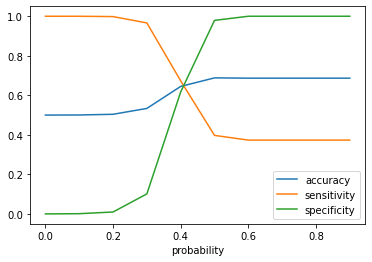

In [232]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

In [233]:
# Creating a column with name "predicted", which is the predicted value for 0.6 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['prob'].map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,class_label,prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.249350,1,1,1,0,0,0,0,0,0,0,0
1,0,0.378761,1,1,1,1,0,0,0,0,0,0,0
2,0,0.349263,1,1,1,1,0,0,0,0,0,0,0
3,0,0.394379,1,1,1,1,0,0,0,0,0,0,0
4,1,0.449278,1,1,1,1,1,0,0,0,0,0,1


In [234]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['class_label'], y_train_pred_final['predicted'])
print(confusion)

[[17464 10845]
 [ 9253 19056]]


In [235]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [236]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['class_label'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.6450245504963086
Sensitivity:- 0.6731428167720513
Specificity:- 0.6169062842205659


In [237]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

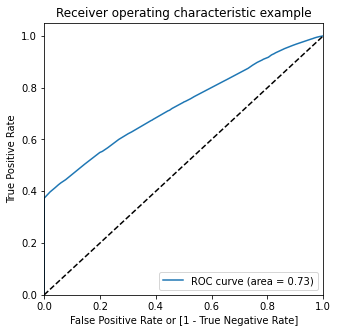

In [238]:
draw_roc(y_train_pred_final['class_label'], y_train_pred_final['prob'])

In [239]:
X_test_log=X_test[rfe_cols]

In [240]:
X_test_sm = sm.add_constant(X_test_log)

In [241]:
y_test_pred = log_1.predict(X_test_sm)

In [242]:
y_test_pred.head()

37611    0.364105
41184    0.417696
45658    0.366555
4908     0.378761
2995     0.456576
dtype: float64

In [243]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
37611,0.364105
41184,0.417696
45658,0.366555
4908,0.378761
2995,0.456576


In [244]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,class_los_label
37611,0
41184,0
45658,0
4908,0
2995,0


In [245]:
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [246]:
y_test_pred_final.head()

,class_los_label,0
37611,0,0.364105
41184,0,0.417696
45658,0,0.366555
4908,0,0.378761
2995,0,0.456576


In [247]:
y_test_pred_final = y_test_pred_final.rename(columns={0:'prob'})

In [248]:
y_test_pred_final.head()

,class_los_label,prob
37611,0,0.364105
41184,0,0.417696
45658,0,0.366555
4908,0,0.378761
2995,0,0.456576


In [249]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['prob'].map(lambda x: 1 if x > 0.4 else 0)

In [250]:
y_test_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10208 entries, 37611 to 9478
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class_los_label  10208 non-null  object 
 1   prob             10208 non-null  float64
 2   test_predicted   10208 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 319.0+ KB


In [251]:
y_test_pred_final.test_predicted=y_test_pred_final.test_predicted.astype("int64")
y_test_pred_final.class_los_label=y_test_pred_final.class_los_label.astype("int64")

In [252]:
confusion = metrics.confusion_matrix(y_test_pred_final['class_los_label'], y_test_pred_final['test_predicted'])
print(confusion)

[[4339 2702]
 [1728 1439]]


In [253]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [254]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['class_los_label'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

#F1 Score
from sklearn.metrics import f1_score
print("F1_Score",f1_score(y_test_pred_final['class_los_label'], y_test_pred_final['test_predicted']))


Accuracy:- 0.5660266457680251
Sensitivity:- 0.45437322387117146
Specificity:- 0.6162476920891918
F1_Score 0.3938149972632732
